In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
fair = pd.read_csv('C://Users//fergu//Fair.csv')

In [3]:
fair.head()

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,1,male,37.0,10.00,no,3,18,7,4,0
1,2,female,27.0,4.00,no,4,14,6,4,0
2,3,female,32.0,15.00,yes,1,12,1,4,0
3,4,male,57.0,15.00,yes,5,18,6,5,0
4,5,male,22.0,0.75,no,2,17,6,3,0


In [4]:
fair.columns

Index(['Unnamed: 0', 'sex', 'age', 'ym', 'child', 'religious', 'education',
       'occupation', 'rate', 'nbaffairs'],
      dtype='object')

In [5]:
fair2 = fair.drop(['Unnamed: 0', 'sex', 'child'], axis=1)
fair2.columns

Index(['age', 'ym', 'religious', 'education', 'occupation', 'rate',
       'nbaffairs'],
      dtype='object')

In [6]:
jitter = pd.DataFrame(np.random.uniform(-0.3, 0.3,size=fair2.shape),columns=fair2.columns)

In [7]:
#jitter.drop(['sex', 'child'], axis=1, inplace=True)

In [8]:
jitter.head()

,age,ym,religious,education,occupation,rate,nbaffairs
0,0.225694,0.269029,0.282083,-0.221519,0.245686,0.036504,-0.138940
1,-0.192820,-0.218105,0.000695,0.201739,0.272063,0.075228,-0.030667
2,-0.172688,0.134344,0.155180,0.195426,-0.103080,0.003506,-0.223081
3,0.241039,-0.064809,-0.277518,0.115888,0.052756,-0.231878,0.263086
4,0.083084,0.115158,-0.103380,0.267091,0.052800,-0.232475,0.145458


In [9]:
fair_j = fair2.add(jitter)

In [10]:
fair_j.head()

,age,ym,religious,education,occupation,rate,nbaffairs
0,37.225694,10.269029,3.282083,17.778481,7.245686,4.036504,-0.138940
1,26.807180,3.781895,4.000695,14.201739,6.272063,4.075228,-0.030667
2,31.827312,15.134344,1.155180,12.195426,0.896920,4.003506,-0.223081
3,57.241039,14.935191,4.722482,18.115888,6.052756,4.768122,0.263086
4,22.083084,0.865158,1.896620,17.267091,6.052800,2.767525,0.145458


In [11]:
corrmat = fair2.corr()

C:\Users\fergu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


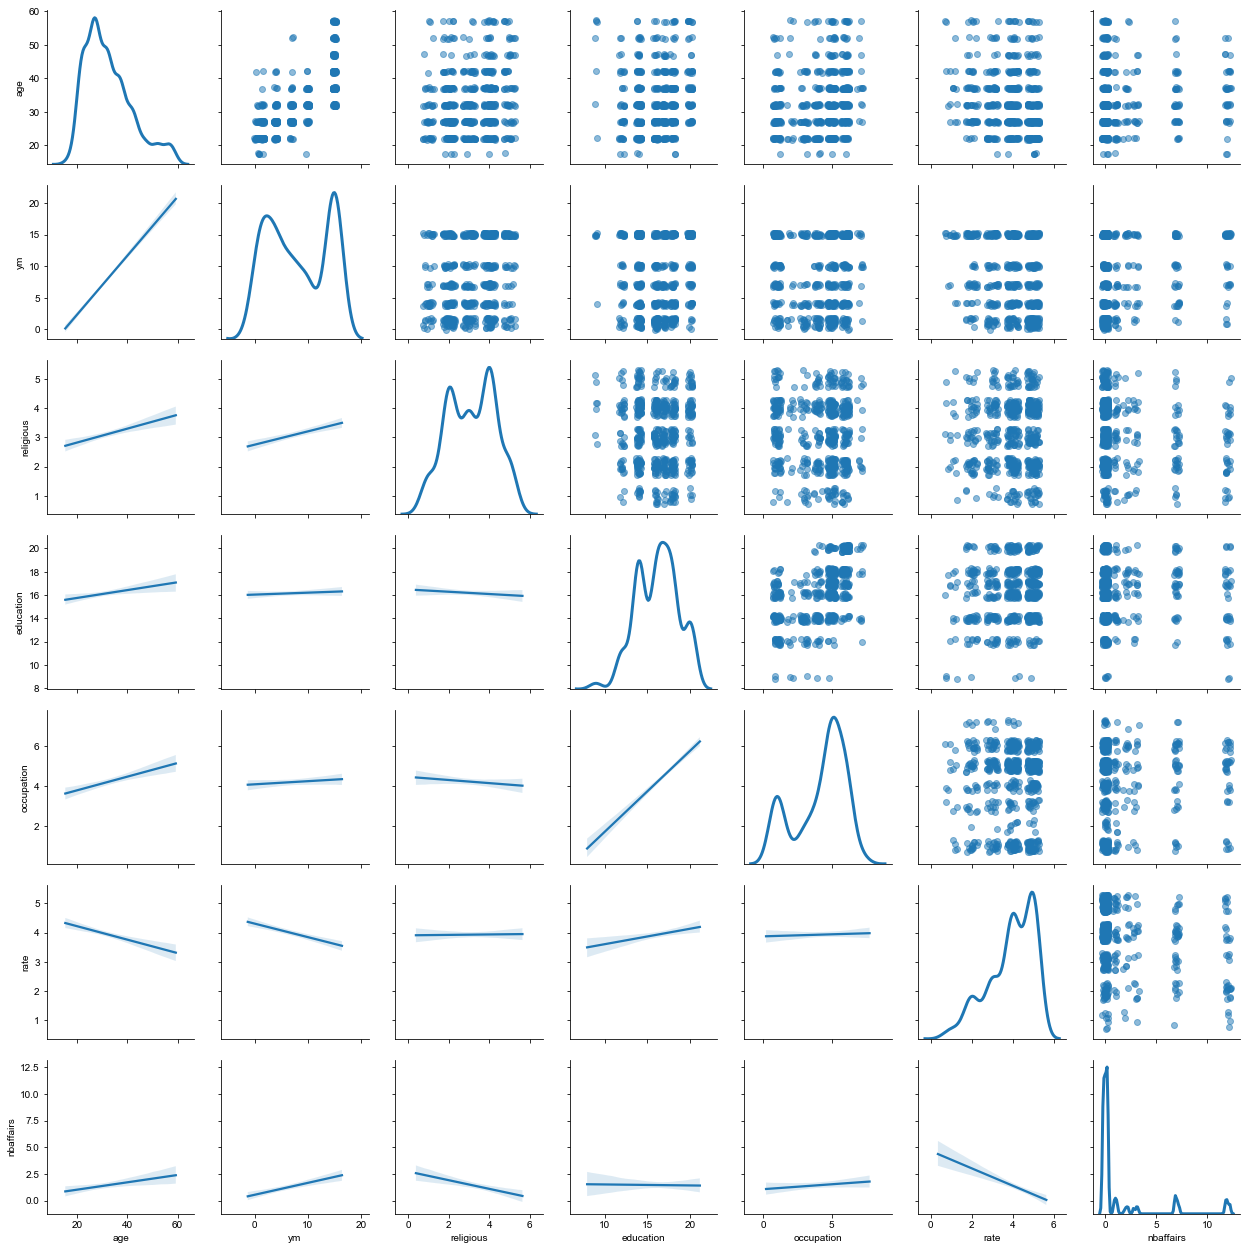

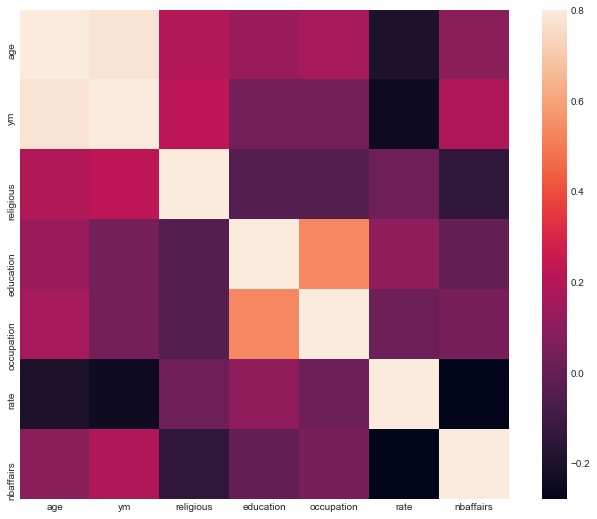

In [12]:
g = sns.PairGrid(fair_j, diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)


sns.set_style('white')
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

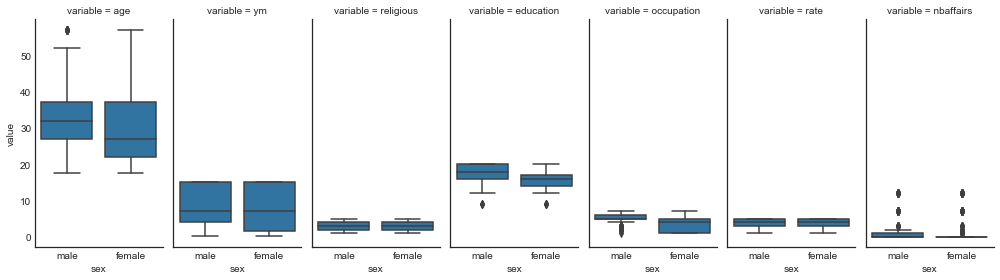

In [13]:
fair3 = fair.drop(['Unnamed: 0', 'child'], axis=1)

fair_long = pd.melt(fair3, id_vars=['sex'])
h = sns.FacetGrid(fair_long, col='variable', size=4, aspect=0.5)
h = h.map(sns.boxplot, 'sex', 'value')
plt.show()

In [14]:
fair4=fair[:]
fair4['affair'] = [1 if fair4['nbaffairs'][j] > 0 else 0 for j in range(0, len(fair4['nbaffairs']))]  

C:\Users\fergu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


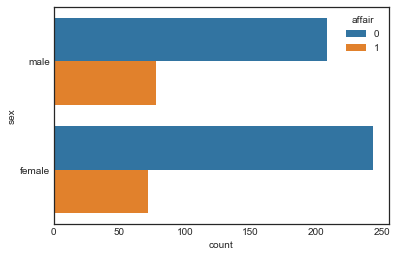

In [15]:
sns.countplot(y='sex', hue='affair', data=fair4)
plt.show()

In [16]:
fair_pca = fair.copy()

In [17]:
fair.head()

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,1,male,37.0,10.00,no,3,18,7,4,0
1,2,female,27.0,4.00,no,4,14,6,4,0
2,3,female,32.0,15.00,yes,1,12,1,4,0
3,4,male,57.0,15.00,yes,5,18,6,5,0
4,5,male,22.0,0.75,no,2,17,6,3,0


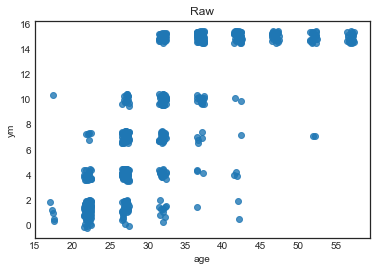

In [18]:
t = sns.regplot('age', 'ym', fair_pca, x_jitter=0.49, y_jitter=0.49, fit_reg=False)
t.axes.set_title('Raw')

plt.show()

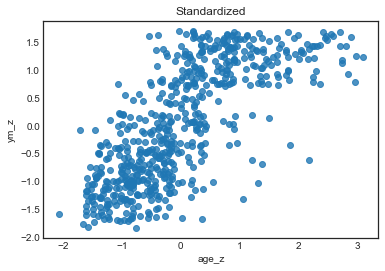

In [19]:
fair_pca['age_z'] = (fair_pca['age'] - fair_pca['age'].mean()) / fair_pca['age'].std()
fair_pca['ym_z'] = (fair_pca['ym'] - fair_pca['ym'].mean()) / fair_pca['ym'].std()
t = sns.regplot('age_z', 'ym_z', fair_pca, x_jitter=0.49, y_jitter=0.49, fit_reg=False)
t.axes.set_title('Standardized')

plt.show()

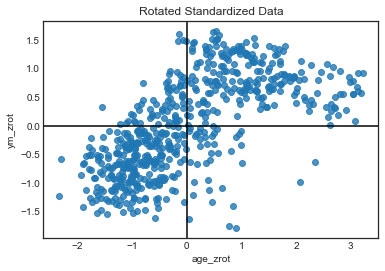

In [48]:
theta=50
fair_pca['age_zrot'] = math.cos(theta) * fair_pca['age_z'] - math.sin(theta) * fair_pca['ym_z']
fair_pca['ym_zrot'] = math.sin(theta) * fair_pca['age_z'] + math.cos(theta) * fair_pca['ym_z']

k = sns.regplot('age_zrot', 'ym_zrot', fair_pca, x_jitter=0.49, y_jitter=0.49, fit_reg=False)
k.axhline(0, color='k')
k.axvline(0, color='k')
k.axes.set_title('Rotated Standardized Data')
plt.show()

In [49]:
fair2.head()

,age,ym,religious,education,occupation,rate,nbaffairs
0,37.0,10.00,3,18,7,4,0
1,27.0,4.00,4,14,6,4,0
2,32.0,15.00,1,12,1,4,0
3,57.0,15.00,5,18,6,5,0
4,22.0,0.75,2,17,6,3,0


In [50]:
X = StandardScaler().fit_transform(fair2)
X

array([[ 0.48620453,  0.32736012, -0.09984465, ...,  1.54314358,
         0.06189062, -0.44171767],
       [-0.591262  , -0.75048429,  0.75739298, ...,  0.99306689,
         0.06189062, -0.44171767],
       [-0.05252873,  1.22556379, -1.8143199 , ..., -1.75731653,
         0.06189062, -0.44171767],
       ..., 
       [-0.05252873,  0.32736012, -0.95708227, ...,  0.99306689,
         0.9691165 ,  0.1650762 ],
       [-1.12999527, -0.21156209, -0.09984465, ...,  0.99306689,
        -1.75256114,  0.1650762 ],
       [-0.05252873,  1.22556379, -0.09984465, ..., -1.75731653,
         0.9691165 , -0.13832073]])

In [51]:
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix: \n', Cx)

Covariance Matrix: 
 [[ 1.00166667  0.77884176  0.19409989  0.13482034  0.1666899  -0.19933157
   0.09539593]
 [ 0.77884176  1.00166667  0.21862444  0.04006939  0.04466633 -0.24352402
   0.18715309]
 [ 0.19409989  0.21862444  1.00166667 -0.04264203 -0.03978853  0.02433627
  -0.14474218]
 [ 0.13482034  0.04006939 -0.04264203  1.00166667  0.53449458  0.10948565
  -0.0024415 ]
 [ 0.1666899   0.04466633 -0.03978853  0.53449458  1.00166667  0.01745131
   0.04969444]
 [-0.19933157 -0.24352402  0.02433627  0.10948565  0.01745131  1.00166667
  -0.27997826]
 [ 0.09539593  0.18715309 -0.14474218 -0.0024415   0.04969444 -0.27997826
   1.00166667]]


In [52]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 7).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)    

Eigenvector 1: 
[[ 0.6163243 ]
 [ 0.61473462]
 [ 0.18804233]
 [ 0.16784049]
 [ 0.20654242]
 [-0.29212058]
 [ 0.22521357]]
Eigenvalue 1: 2.059632638386785
----------------------------------------
Eigenvector 2: 
[[ 0.6928486 ]
 [-0.70644766]
 [ 0.03670446]
 [-0.00929138]
 [-0.10312893]
 [-0.00727412]
 [ 0.09365092]]
Eigenvalue 2: 0.20618848370303727
----------------------------------------
Eigenvector 3: 
[[-0.02790137]
 [-0.15459087]
 [-0.12717192]
 [ 0.67299886]
 [ 0.6414145 ]
 [ 0.28579948]
 [-0.11458232]]
Eigenvalue 3: 1.5512517081105273
----------------------------------------
Eigenvector 4: 
[[ 0.16921277]
 [ 0.12671202]
 [ 0.60325774]
 [-0.03265658]
 [-0.11224206]
 [ 0.43139862]
 [-0.62579685]]
Eigenvalue 4: 1.2792973323227141
----------------------------------------
Eigenvector 5: 
[[-0.0676228 ]
 [ 0.02740756]
 [ 0.02720811]
 [ 0.71556152]
 [-0.68132809]
 [-0.13286735]
 [ 0.00676067]]
Eigenvalue 5: 0.45956278193035094
----------------------------------------
Eigenvector 6: 
[[-

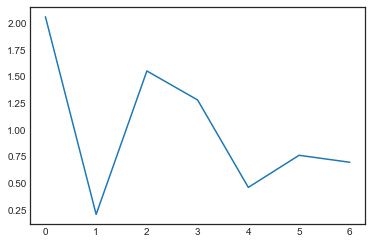

In [53]:
plt.plot(eig_val_cov)
plt.show()

In [54]:
fair_extra = fair.copy()

In [55]:
fair_extra.head()

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,1,male,37.0,10.00,no,3,18,7,4,0
1,2,female,27.0,4.00,no,4,14,6,4,0
2,3,female,32.0,15.00,yes,1,12,1,4,0
3,4,male,57.0,15.00,yes,5,18,6,5,0
4,5,male,22.0,0.75,no,2,17,6,3,0


In [56]:
fair_extra['irrel'] = fair_extra['religious'].max() - fair_extra['religious']

In [57]:
fair_extra.head()

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,irrel
0,1,male,37.0,10.00,no,3,18,7,4,0,2
1,2,female,27.0,4.00,no,4,14,6,4,0,1
2,3,female,32.0,15.00,yes,1,12,1,4,0,4
3,4,male,57.0,15.00,yes,5,18,6,5,0,0
4,5,male,22.0,0.75,no,2,17,6,3,0,3


In [58]:
fair_extra['affairs5'] = [1 if fair_extra['nbaffairs'][i] >= 5 else 0 for i in range(0, len(fair_extra['nbaffairs']))]
fair_extra.head()

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,irrel,affairs5
0,1,male,37.0,10.00,no,3,18,7,4,0,2,0
1,2,female,27.0,4.00,no,4,14,6,4,0,1,0
2,3,female,32.0,15.00,yes,1,12,1,4,0,4,0
3,4,male,57.0,15.00,yes,5,18,6,5,0,0,0
4,5,male,22.0,0.75,no,2,17,6,3,0,3,0


In [59]:
fair_extra['rate'].value_counts()

5    232
4    194
3     93
2     66
1     16
Name: rate, dtype: int64

In [60]:
fair_extra['earner'] = [1 if fair_extra['education'][j] >= 12 & fair_extra['occupation'][j] >= 4 else 0 for j in range(0, len(fair_extra['education']))]
fair_extra.head()

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,irrel,affairs5,earner
0,1,male,37.0,10.00,no,3,18,7,4,0,2,0,1
1,2,female,27.0,4.00,no,4,14,6,4,0,1,0,1
2,3,female,32.0,15.00,yes,1,12,1,4,0,4,0,0
3,4,male,57.0,15.00,yes,5,18,6,5,0,0,0,1
4,5,male,22.0,0.75,no,2,17,6,3,0,3,0,1


In [61]:
fair_extra.earner.value_counts()

1    428
0    173
Name: earner, dtype: int64

In [62]:
fair_extra['childbin'] = [1 if fair_extra['child'][j] == 'yes' else 0 for j in range(0, len(fair_extra['child']))]
fair_extra.head()

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,irrel,affairs5,earner,childbin
0,1,male,37.0,10.00,no,3,18,7,4,0,2,0,1,0
1,2,female,27.0,4.00,no,4,14,6,4,0,1,0,1,0
2,3,female,32.0,15.00,yes,1,12,1,4,0,4,0,0,1
3,4,male,57.0,15.00,yes,5,18,6,5,0,0,0,1,1
4,5,male,22.0,0.75,no,2,17,6,3,0,3,0,1,0


In [63]:
fair_extra['unhap'] = fair_extra['rate'].max() - fair_extra['rate']
fair_extra.head()

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,irrel,affairs5,earner,childbin,unhap
0,1,male,37.0,10.00,no,3,18,7,4,0,2,0,1,0,1
1,2,female,27.0,4.00,no,4,14,6,4,0,1,0,1,0,1
2,3,female,32.0,15.00,yes,1,12,1,4,0,4,0,0,1,1
3,4,male,57.0,15.00,yes,5,18,6,5,0,0,0,1,1,0
4,5,male,22.0,0.75,no,2,17,6,3,0,3,0,1,0,2


In [64]:
fair_extra['sexbin'] = [1 if fair_extra['sex'][m] == 'male' else 0 for m in range(0, len(fair_extra['sex']))]
fair_extra.head()

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,irrel,affairs5,earner,childbin,unhap,sexbin
0,1,male,37.0,10.00,no,3,18,7,4,0,2,0,1,0,1,1
1,2,female,27.0,4.00,no,4,14,6,4,0,1,0,1,0,1,0
2,3,female,32.0,15.00,yes,1,12,1,4,0,4,0,0,1,1,0
3,4,male,57.0,15.00,yes,5,18,6,5,0,0,0,1,1,0,1
4,5,male,22.0,0.75,no,2,17,6,3,0,3,0,1,0,2,1


In [65]:
fair_extra['age'].value_counts()

27.0    153
22.0    117
32.0    115
37.0     88
42.0     56
47.0     23
57.0     22
52.0     21
17.5      6
Name: age, dtype: int64

In [66]:
fair_extra['youth'] = 60 - fair_extra['age']

In [67]:
fair_extra.head()

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,irrel,affairs5,earner,childbin,unhap,sexbin,youth
0,1,male,37.0,10.00,no,3,18,7,4,0,2,0,1,0,1,1,23.0
1,2,female,27.0,4.00,no,4,14,6,4,0,1,0,1,0,1,0,33.0
2,3,female,32.0,15.00,yes,1,12,1,4,0,4,0,0,1,1,0,28.0
3,4,male,57.0,15.00,yes,5,18,6,5,0,0,0,1,1,0,1,3.0
4,5,male,22.0,0.75,no,2,17,6,3,0,3,0,1,0,2,1,38.0


In [68]:
fair_extra2 = fair_extra.drop(['Unnamed: 0'], axis=1)

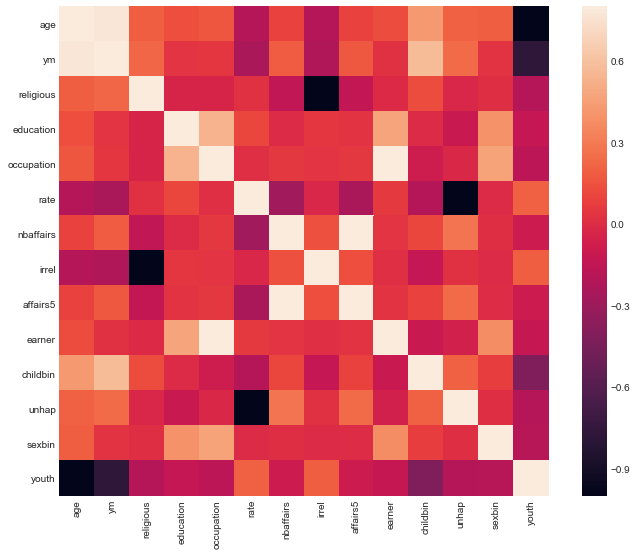

In [69]:
corrmat2=fair_extra2.corr()

f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat2, vmax=0.8, square=True)
plt.show()

In [70]:
fair_extra3 = fair_extra2.drop(['sex', 'child'], axis=1)
fair_extra3.head()

,age,ym,religious,education,occupation,rate,nbaffairs,irrel,affairs5,earner,childbin,unhap,sexbin,youth
0,37.0,10.00,3,18,7,4,0,2,0,1,0,1,1,23.0
1,27.0,4.00,4,14,6,4,0,1,0,1,0,1,0,33.0
2,32.0,15.00,1,12,1,4,0,4,0,0,1,1,0,28.0
3,57.0,15.00,5,18,6,5,0,0,0,1,1,0,1,3.0
4,22.0,0.75,2,17,6,3,0,3,0,1,0,2,1,38.0


In [71]:
M = StandardScaler().fit_transform(fair_extra3)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Mt = M.T
Cm = np.cov(Mt)
print('Covariance Matrix:\n', Mt)

Covariance Matrix:
 [[ 0.48620453 -0.591262   -0.05252873 ..., -0.05252873 -1.12999527
  -0.05252873]
 [ 0.32736012 -0.75048429  1.22556379 ...,  0.32736012 -0.21156209
   1.22556379]
 [-0.09984465  0.75739298 -1.8143199  ..., -0.95708227 -0.09984465
  -0.09984465]
 ..., 
 [-0.06189062 -0.06189062 -0.06189062 ..., -0.9691165   1.75256114
  -0.9691165 ]
 [ 1.04947539 -0.95285702 -0.95285702 ...,  1.04947539  1.04947539
  -0.95285702]
 [-0.48620453  0.591262    0.05252873 ...,  0.05252873  1.12999527
   0.05252873]]


In [72]:
Cm.shape

(14, 14)

In [73]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cm)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 14).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.45604479]
 [ 0.43989386]
 [ 0.14753328]
 [ 0.09743172]
 [ 0.13653515]
 [-0.25629156]
 [ 0.18242501]
 [-0.14753328]
 [ 0.17519394]
 [ 0.11167362]
 [ 0.30344313]
 [ 0.25629156]
 [ 0.13777342]
 [-0.45604479]]
Eigenvalue 1: 3.6273412541744703
----------------------------------------
Eigenvector 2: 
[[ 0.04268672]
 [-0.07267408]
 [-0.01431757]
 [ 0.42178424]
 [ 0.50892288]
 [ 0.25705796]
 [-0.1366161 ]
 [ 0.01431757]
 [-0.12455735]
 [ 0.49705143]
 [-0.12797734]
 [-0.25705796]
 [ 0.35211551]
 [-0.04268672]]
Eigenvalue 2: 2.6889694906267305
----------------------------------------
Eigenvector 3: 
[[ 0.12588192]
 [ 0.11294845]
 [ 0.46432253]
 [-0.09225607]
 [-0.15920274]
 [ 0.24884998]
 [-0.41344844]
 [-0.46432253]
 [-0.40473065]
 [-0.13525562]
 [ 0.09236349]
 [-0.24884998]
 [-0.07126276]
 [-0.12588192]]
Eigenvalue 3: 2.48637528798142
----------------------------------------
Eigenvector 4: 
[[-0.2672724 ]
 [-0.2233871 ]
 [ 0.48079402]
 [ 0.01343423]
 [ 0.15822973]
 [-0.311

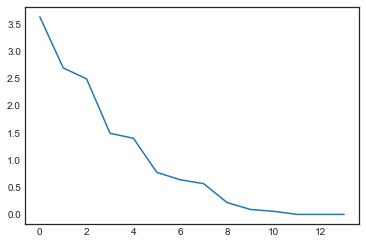

In [75]:
#Scree plot shows no clear indication as to which components should be kept
plt.plot(eig_val_cov)
plt.show()

In [84]:
# Filter method to select the best five features to predict no. of affairs.
# At this point only filter method known is correlation of a variable with this variable.
# So that is what will be used.
# Thus the best 5 features are: 1. Unhappiness (with marriage), 2. Years married, 
# 3. Irreligiosity, 4. Has children, 5. Age
corrmat2['nbaffairs'].sort_values(ascending=False).head(7)

nbaffairs    1.000000
affairs5     0.941484
unhap        0.279512
ym           0.186842
irrel        0.144501
childbin     0.104010
age          0.095237
Name: nbaffairs, dtype: float64